Дано: API для данных о футбольных матчах и командах. 
http://api.football-data.org/docs/v1/index.html

Используя kmeans сделать кластеризацию футбольных команд по стоимости и количеству проигрышей, результат отобразить в виде точечного графика для случая из 3 и из 5 кластеров.

In [47]:
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import whiten, kmeans2

%matplotlib inline

In [48]:
def call_api(uri, result_key):
    json = {}
    try:
        json = requests.get(uri, headers = { 'X-Auth-Token': 'c52b7825851b4357af3e06c1888152f0' }).json()
        return json[result_key]
    except:
        print(json)
        return None

In [66]:
teams = call_api('http://api.football-data.org/v1/competitions/434', 'teams')
teams

{'error': 'The resource you are looking for does not exist.'}


In [63]:
team_for_pd = []
for team in teams:
    
    if team['squadMarketValue']:
        squadMarketValue = team['squadMarketValue'].replace(',', '').replace(' €', '')
        squadMarketValue = int(squadMarketValue)
        fixtures = call_api(team['_links']['fixtures']['href'], 'fixtures')
        defeats = 0
        for f in fixtures:
            if f['status'] == 'FINISHED': #and f['competition']['href'] =='http://api.football-data.org/v1/competitions/440':
                if team['name'] == f['homeTeamName']:
                    if f['result']['goalsAwayTeam'] > f['result']['goalsHomeTeam']:
                        defeats = defeats + 1
                else:
                    if f['result']['goalsHomeTeam'] > f['result']['goalsAwayTeam']:
                        defeats = defeats + 1

            team_for_pd.append({'name': team['name'], 'squadMarketValue': squadMarketValue, 'defeats': defeats})


KeyError: 'squadMarketValue'

In [58]:
teams_pd = pd.DataFrame(team_for_pd)

In [59]:
teams_pd.plot.scatter(x='squadMarketValue', y='defeats', s=100)

TypeError: Empty 'DataFrame': no numeric data to plot

In [60]:
del teams_pd['name']

KeyError: 'name'

In [38]:
whitened = whiten(teams_pd.as_matrix())

array([[ 0.9210756 ,  0.26088218],
       [ 0.6908067 ,  0.19775757],
       [ 1.6118823 ,  2.79203115],
       [ 1.3816134 ,  0.55825828],
       [ 1.6118823 ,  2.47320254],
       [ 1.6118823 ,  3.73076316],
       [ 0.6908067 ,  0.60782096],
       [ 1.6118823 ,  1.6411166 ],
       [ 1.1513445 ,  1.00037714],
       [ 1.1513445 ,  2.29517141],
       [ 2.30268901,  2.42881805],
       [ 2.07242011,  1.85601152],
       [ 3.45403351,  0.99026734],
       [ 1.3816134 ,  0.23795019],
       [ 0.9210756 ,  2.2231699 ],
       [ 1.8421512 ,  1.16386002],
       [ 0.9210756 ,  0.88645694],
       [ 4.60537801,  1.01245959],
       [ 0.6908067 ,  3.77169552],
       [ 2.07242011,  0.83220923],
       [ 3.45403351,  1.35101463],
       [ 0.6908067 ,  0.75281031],
       [ 1.8421512 ,  2.59032829],
       [ 3.68430241,  0.80656486],
       [ 1.6118823 ,  2.1156608 ],
       [ 1.3816134 ,  0.97547251]])

In [40]:
centroids, cluster_map = kmeans2(whitened, 3)

(array([[ 1.54280163,  2.62768523],
        [ 1.2281008 ,  0.759581  ],
        [ 3.79943686,  1.0400766 ]]),
 array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 0, 1, 1, 2, 0, 1, 2, 1, 0,
        2, 0, 1], dtype=int32))

In [41]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

['g',
 'g',
 'r',
 'g',
 'r',
 'r',
 'g',
 'g',
 'g',
 'r',
 'r',
 'r',
 'b',
 'g',
 'r',
 'g',
 'g',
 'b',
 'r',
 'g',
 'b',
 'g',
 'r',
 'b',
 'r',
 'g']

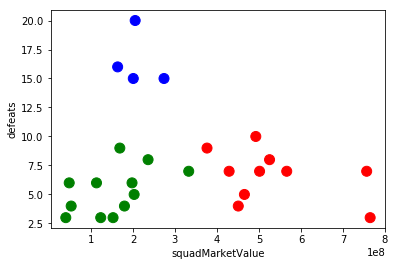

In [43]:
teams_pd.plot.scatter(x='squadMarketValue', y='defeats', c=colors, s=100)

In [44]:
centroids, cluster_map = kmeans2(whitened, 5)

(array([[ 3.79943686,  1.0400766 ],
        [ 1.8421512 ,  2.57109501],
        [ 1.47372096,  2.02622605],
        [ 1.1513445 ,  3.75122934],
        [ 1.19321158,  0.67944139]]),
 array([4, 4, 1, 4, 1, 3, 4, 2, 4, 2, 1, 2, 0, 4, 2, 4, 4, 0, 3, 4, 0, 4, 1,
        0, 2, 4], dtype=int32))

In [45]:
colors_map = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'm'}
colors = [colors_map[c] for c in cluster_map]

['m',
 'm',
 'g',
 'm',
 'g',
 'y',
 'm',
 'b',
 'm',
 'b',
 'g',
 'b',
 'r',
 'm',
 'b',
 'm',
 'm',
 'r',
 'y',
 'm',
 'r',
 'm',
 'g',
 'r',
 'b',
 'm']

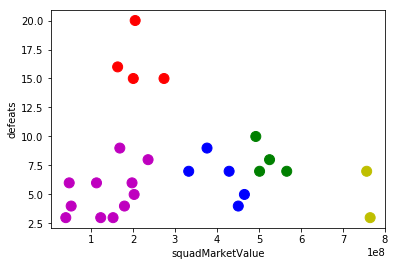

In [46]:
teams_pd.plot.scatter(x='squadMarketValue', y='defeats', c=colors, s=100)